In [81]:
import os
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Load the input graph as an adjacency matrix

In [88]:
file_name = "accumulated_flow_adm.txt"  # 1 tank node
# file_name = "accumulated_flow_2tanks_adm.txt"  # 2 tank nodes

if os.path.exists("./playgrounds/data/ACCUMULATED_FLOW/"+file_name):
    gfile = "playgrounds/data/ACCUMULATED_FLOW/"+file_name
elif not os.path.exists("./data/ACCUMULATED_FLOW/"+file_name):
    ## Conditional branch for Google Colab
    !git clone https://github.com/mazzalab/playgrounds.git
    gfile = "playgrounds/data/ACCUMULATED_FLOW/"+file_name
else:
    gfile = "data/ACCUMULATED_FLOW/"+file_name

In [89]:
gfile = "playgrounds/data/ACCUMULATED_FLOW/accumulated_flow_adm.txt"

In [87]:
data = pd.read_csv(gfile, sep="\t", header=0)
data.head

<bound method NDFrame.head of     A  B  C  D  E  F  G  H  I  J  K  L
0   0  0  0  0  1  0  0  0  0  0  0  0
1   0  0  0  0  0  1  0  0  0  0  0  0
2   0  0  0  0  0  1  0  0  0  0  0  0
3   0  0  0  0  0  0  0  1  0  0  0  0
4   0  0  0  0  0  0  0  0  1  1  0  0
5   0  0  0  0  0  0  0  0  0  1  0  0
6   0  0  0  0  0  0  0  0  0  1  0  0
7   0  0  0  0  0  0  1  0  0  0  1  0
8   0  0  0  0  0  0  0  0  0  0  0  1
9   0  0  0  0  0  0  0  0  0  0  0  1
10  0  0  0  0  0  0  0  0  0  0  0  1
11  0  0  0  0  0  0  0  0  0  0  0  0>

In [41]:
# Get the values as np.array
A = data.values
g = ig.Graph.Adjacency((A > 0).tolist())

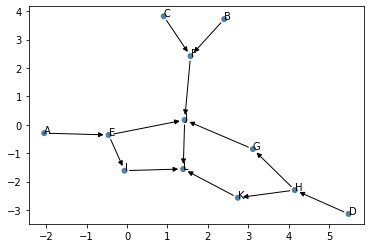

In [42]:
fig, ax = plt.subplots()
ig.plot(g, target=ax, labels=True, vertex_label=data.columns)

In [68]:
# check if the graph is simple
is_simple = g.is_simple()
if not is_simple:
    print("\x1b[31m\"This graph cannot be analyzed because there are loopsred\"\x1b[0m")
else:
    print("\033[94m\"OK\"\033[94m")

"OK"


## Get sink and tank nodes

In [70]:
sink=g.vs.select(_indegree=0)["name"]
tank=g.vs.select(_outdegree=0)["name"]

print("Sink nodes:")
display(sink)
print("Tank nodes:")
display(tank)

Sink nodes:


['A', 'B', 'C', 'D']

Tank nodes:


['L']

## Compute flows recursively

In [74]:
def get_score(node_name:str, ready_nodes:list):
    if node_name in ready_nodes:
        return ready_nodes[node_name]
    else:
        curr_node = g.vs.find(node_name)
                
        # get neighbor nodes
        neighbors_idx = g.neighbors(curr_node, mode="in")
        neighbors_names = g.vs[neighbors_idx]["name"]
        display(f"The neighbors of {node_name} are {neighbors_names}")

        this_node_score = 0
        for j in range(0, len(neighbors_names)):
            this_node_score += get_score(neighbors_names[j], ready_nodes)

        # divide the score by the number of outgoing edges if this node is not a tank node
        if curr_node.outdegree() > 0:
            this_node_score /= curr_node.outdegree()

        display(f'The outgoing flow from node {curr_node["name"]} is: {this_node_score}')
        ready_nodes[node_name] = this_node_score
        return this_node_score

In [75]:
# set all starting flows to 1
ready_nodes = {sink[i]: 1 for i in range(0, len(sink))}
ready_nodes

{'A': 1, 'B': 1, 'C': 1, 'D': 1}

## and do it for each tank node (i.e., nodes with no outgoing edges)

In [76]:
for i in range(0, len(tank)):
    t_name = tank[i]
    
    display(f"The flow to {t_name} is {get_score(t_name, ready_nodes)}")

"The neighbors of L are ['I', 'J', 'K']"

"The neighbors of I are ['E']"

"The neighbors of E are ['A']"

'The outgoing flow from node E is: 0.5'

'The outgoing flow from node I is: 0.5'

"The neighbors of J are ['E', 'F', 'G']"

"The neighbors of F are ['B', 'C']"

'The outgoing flow from node F is: 2.0'

"The neighbors of G are ['H']"

"The neighbors of H are ['D']"

'The outgoing flow from node H is: 0.5'

'The outgoing flow from node G is: 0.5'

'The outgoing flow from node J is: 3.0'

"The neighbors of K are ['H']"

'The outgoing flow from node K is: 0.5'

'The outgoing flow from node L is: 4.0'

'The flow to L is 4.0'

# Print system and required packages information

In [78]:
%load_ext watermark
%watermark -v -m -p pandas,matplotlib,IPython,igraph,watermark,jupyterlab

# date
print(" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.5
IPython version      : 7.24.1

pandas    : 1.2.5
matplotlib: 3.4.2
IPython   : 7.24.1
igraph    : 0.9.1
watermark : 2.2.0
jupyterlab: 3.0.16

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores   : 8
Architecture: 64bit

 
Last updated: Thu Jun 24 2021 14:20:49W. Europe Summer Time

